In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
from davisinteractive.client import DavisInteractiveSession
from davisinteractive.dataset import Davis
from davisinteractive.utils.scribbles import scribbles2mask

import matplotlib.pyplot as plt
%matplotlib inline

davis_root = '/Users/alberto/Workspace/CVL/datasets/davis-2017/data/DAVIS/'
davis = Davis(davis_root)

def model(sequence, scribbles):
    seq_info = davis.dataset['sequences'][sequence]
    img_size = tuple(seq_info['image_size'][::-1])
    
    masks = scribbles2mask(scribbles, img_size, default_value=0, bezier_curve_sampling=True, bresenham_=True)
    return masks

with DavisInteractiveSession(host='localhost', davis_root=davis_root, 
                             subset='val', max_time=None, max_nb_interactions=3) as sess:
    count = 15
    while sess.is_running() and count:
        sequence, scribbles, new_sequence = sess.get_scribbles(only_last=False)
        print(sequence, new_sequence)
        
        annotated_frame = scribbles['annotated_frame']
        print(annotated_frame)
        masks = model(sequence, scribbles)
        
#         plt.figure(dpi=600)
        plt.imshow(masks[annotated_frame])
        plt.axis('off')
        plt.show()
        
        sess.submit_masks(masks)
        count -= 1
#         break

    df = sess.get_report()

# Model: Pixel Wise Metric Learning

Loading sequence: bike-packing


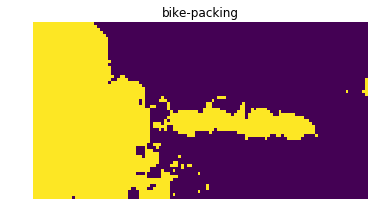

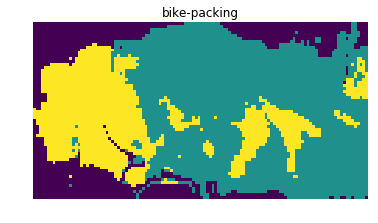

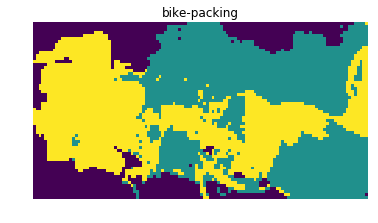

In [6]:
from davisinteractive.client import DavisInteractiveSession
from davisinteractive.dataset import Davis
from davisinteractive.utils.scribbles import scribbles2mask, scribbles2points
from davisinteractive.models.pixelwise_metric_learning import PixelWiseMetricLearningModel

import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

davis_root = '/Users/alberto/Workspace/CVL/datasets/davis-2017/data/DAVIS/'
davis = Davis(davis_root)

model = PixelWiseMetricLearningModel('../../pixelwise-metric-learning-demo/pixelnn/assets/data/dataset.hdf5')
MAX_N = 300

with DavisInteractiveSession(host='localhost', davis_root=davis_root, 
                             subset='val', max_time=None, max_nb_interactions=3) as sess:
    count = 3
    while sess.is_running() and count:
        sequence, scribbles, new_sequence = sess.get_scribbles(only_last=False)
        annotated_frame = scribbles['annotated_frame']
  
        if new_sequence:
            print(f'Loading sequence: {sequence}')
            model.load_sequence(sequence)
            
        X, Y = scribbles2points(scribbles, model.IMG_SIZE)
        
        # Downsample points
        n = len(X)
        if n > MAX_N: 
            idx = np.random.choice(n, size=MAX_N, replace=False)
            X = X[idx]
            Y = Y[idx]

        pred_masks_ds = model(X, Y)
        
        seq_info = davis.dataset['sequences'][sequence]
        img_size = tuple(seq_info['image_size'][::-1])
        
        f, _, _ = pred_masks_ds.shape
        pred_masks = np.empty((f,) + img_size, dtype=np.int)
        for i in range(f):
            m = pred_masks_ds[i]
            m = cv2.resize(m, img_size[::-1], interpolation=cv2.INTER_NEAREST)
            pred_masks[i] = m
            
        plt.imshow(pred_masks[annotated_frame])
        plt.title(sequence)
        plt.axis('off')
        plt.show()
        
        
        sess.submit_masks(pred_masks)
        count -= 1
#         break

    df = sess.get_report()

In [9]:
df

,sequence,scribble_idx,interaction,object_id,frame,jaccard,timming
0,bike-packing,1,1,0,0,0.025071,1.149265
1,bike-packing,1,1,1,0,0.068881,1.149265
2,bike-packing,1,1,0,1,0.020763,1.149265
3,bike-packing,1,1,1,1,0.079203,1.149265
4,bike-packing,1,1,0,2,0.017901,1.149265
5,bike-packing,1,1,1,2,0.083715,1.149265
6,bike-packing,1,1,0,3,0.020725,1.149265
7,bike-packing,1,1,1,3,0.074807,1.149265
8,bike-packing,1,1,0,4,0.022205,1.149265
9,bike-packing,1,1,1,4,0.065177,1.149265


In [10]:
df.groupby(['sequence', 'scribble_idx', 'interaction', 'object_id']).mean()

jaccard   timming
sequence     scribble_idx interaction object_id                    
bike-packing 1            1           0          0.085982  1.149265
                                      1          0.055115  1.149265
                          2           0          0.131170  1.034123
                                      1          0.018850  1.034123
                          3           0          0.066177  1.030153
                                      1          0.057786  1.030153